In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  #用来解决matplotlib画图重复加载版本报错

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(0,math.pi*8,2000)

In [4]:
y = np.sin(x)

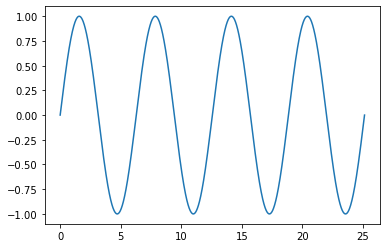

In [5]:
plt.plot(x,y)

In [6]:
#利用前3个波浪线来预测第4个波浪线
#特征就是前5日的数值
train = []
label = []
for i in range(len(y)-5):
    train.append(y[i:i+5])
    label.append(y[i+5])
train = np.array(train)
label = np.array(label)

In [7]:
len(train)

1995

In [8]:
p = 0.75
# X_train = train[:int(len(train)*p)]
# y_train = label[:int(len(train)*p)]
# X_test = train[int(len(train)*p):]
# y_test = label[int(len(train)*p):]

X_train = train[:1500]
y_train = label[:1500]
X_test = train[1500:]
y_test = label[1500:]

In [9]:
NN_net = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [10]:
class LSTM_net(nn.Module):
    def __init__(self,inp_dim, mid_dim, num_layers,out_dim):
        super().__init__()
        self.lstm = nn.LSTM(inp_dim, mid_dim, num_layers)
        self.out = nn.Sequential(
                    nn.Linear(mid_dim, mid_dim),
                    nn.Tanh(),
                    nn.Linear(mid_dim, out_dim),
)
    def forward(self, x):

        input,_ = self.lstm(x)
        seq_len, batch_size, mid_dim = input.shape
        input = input.view(seq_len * batch_size, mid_dim)
        output = self.out(input)
        output = output.view(seq_len, batch_size, -1)
        return output

In [11]:
# lstm_net = nn.LSTM(inp_dim, mid_dim, num_layers)
# input = torch.randn(seq_len, batch_size, inp_dim)
# output == (seq_len, batch_size, mid_dim)

In [12]:
inp_dim = 5
mid_dim = 10
num_layers = 1
out_dim = 1
net = LSTM_net(inp_dim, mid_dim, num_layers,out_dim)

In [13]:
criterion=nn.MSELoss() # 使用CrossEntropyLoss损失
optm=torch.optim.Adam(net.parameters(), lr=0.1) # Adam优化
epochs=200 # 训练1000次

In [14]:
feature_dims = 5

In [15]:
batch_size = 5

In [16]:
# train_x_tensor = train_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5
# train_y_tensor = train_y.reshape(-1, 5, OUTPUT_FEATURES_NUM)

In [17]:
X_train.shape

(1500, 5)

In [18]:
x=torch.from_numpy(X_train).float().reshape(-1,batch_size,inp_dim)
# print(x.shape)
y=torch.from_numpy(y_train).float().reshape(-1,batch_size,out_dim)

In [19]:
y_test.shape

(495,)

In [20]:

for i in range(epochs):
    # 指定模型为训练模式，计算梯度
    net.train()
    # 输入值都需要转化成torch的Tensor
    
    y_hat=net(x)
    loss=criterion(y_hat,y) # 计算损失
    optm.zero_grad() # 前一步的损失清零
    loss.backward() # 反向传播
    optm.step() # 优化
    if (i+1)%1 ==0 : # 这里我们每100次输出相关的信息
        # 指定模型为计算模式
        net.eval()
        test_in=torch.from_numpy(X_test).float()
        test_in = test_in.reshape(-1,batch_size,inp_dim)
        test_l=torch.from_numpy(y_test).float()
        test_l = test_l.reshape(-1,batch_size,out_dim)
        test_out=net(test_in)
#         print("test_out:", test_out.shape)
#         print("test_l:", test_l.shape)
        
        #print("test_out:",test_out,test_out.shape)
        #print(test_out.max(-1)[0])
        # 使用我们的测试函数计算准确率
        accu=criterion(test_out,test_l)
        print("Epoch:{},Loss:{:.4f},Test loss：{:.2f}".format(i+1,loss.item(),accu))

Epoch:1,Loss:0.5102,Test loss：0.32
Epoch:2,Loss:0.3185,Test loss：0.08
Epoch:3,Loss:0.0937,Test loss：0.15
Epoch:4,Loss:0.1814,Test loss：0.05
Epoch:5,Loss:0.0647,Test loss：0.08
Epoch:6,Loss:0.0807,Test loss：0.10
Epoch:7,Loss:0.1031,Test loss：0.08
Epoch:8,Loss:0.0771,Test loss：0.05
Epoch:9,Loss:0.0489,Test loss：0.03
Epoch:10,Loss:0.0294,Test loss：0.03
Epoch:11,Loss:0.0330,Test loss：0.04
Epoch:12,Loss:0.0388,Test loss：0.01
Epoch:13,Loss:0.0142,Test loss：0.01
Epoch:14,Loss:0.0103,Test loss：0.02
Epoch:15,Loss:0.0198,Test loss：0.01
Epoch:16,Loss:0.0111,Test loss：0.01
Epoch:17,Loss:0.0073,Test loss：0.01
Epoch:18,Loss:0.0114,Test loss：0.02
Epoch:19,Loss:0.0158,Test loss：0.01
Epoch:20,Loss:0.0123,Test loss：0.01
Epoch:21,Loss:0.0068,Test loss：0.01
Epoch:22,Loss:0.0064,Test loss：0.01
Epoch:23,Loss:0.0081,Test loss：0.01
Epoch:24,Loss:0.0069,Test loss：0.00
Epoch:25,Loss:0.0042,Test loss：0.00
Epoch:26,Loss:0.0035,Test loss：0.00
Epoch:27,Loss:0.0048,Test loss：0.01
Epoch:28,Loss:0.0056,Test loss：0.00
E

In [24]:
test_l = test_l.reshape(-1,out_dim)
test_out = test_out.reshape(-1,out_dim)

In [25]:
test_out.shape

torch.Size([495, 1])

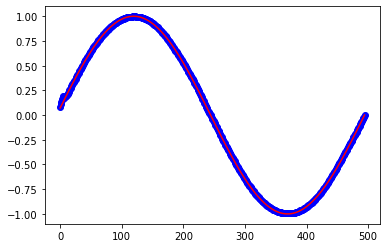

In [26]:
plt.plot(range(len(test_l)),test_l,"r")
plt.scatter(range(len(test_out.detach())),test_out.detach(),c="b")

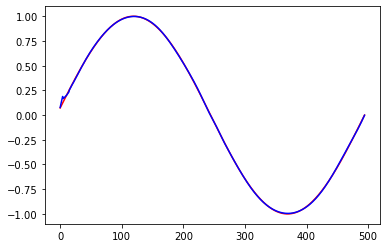

In [27]:
plt.plot(range(len(test_l)),test_l,"r")
plt.plot(range(len(test_out.detach())),test_out.detach(),c="b")